# `00` Preface

## Introduction
You are given a set of features extracted from the shape of the beans in images and it's required to predict the type of each bean. There are 7 bean types in this dataset.

## Data Fields
The dataset consists of features describing the shape of the bean and you're required to predict it's type.
- ID - an ID for this instance
- Area - (A), The area of a bean zone and the number of pixels within its boundaries.
- Perimeter - (P), Bean circumference is defined as the length of its border.
- MajorAxisLength - (L), The distance between the ends of the longest line that can be drawn from a bean.
- MinorAxisLength - (l), The longest line that can be drawn from the bean while standing perpendicular to the main axis.
- AspectRatio - (K), Defines the relationship between L and l.
- Eccentricity - (Ec), Eccentricity of the ellipse having the same moments as the region.
- ConvexArea - (C), Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
- EquivDiameter - (Ed), The diameter of a circle having the same area as a bean seed area.
- Extent - (Ex), The ratio of the pixels in the bounding box to the bean area.
- Solidity - (S), Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
- Roundness - (R), Calculated with the following formula: (4piA)/(P^2)
- Compactness - (CO), Measures the roundness of an object: Ed/L
- ShapeFactor1 - (SF1)
- ShapeFactor2 - (SF2)
- ShapeFactor3 - (SF3)
- ShapeFactor4 - (SF4)
- y - the class of the bean. It can be any of BARBUNYA, SIRA, HOROZ, DERMASON, CALI, BOMBAY, and SEKER.

-------------------------

# `01` Importing Libraries

## `i` Data Manipulation Libraries

In [1]:
import numpy as np
import pandas as pd
import os # For the Path
from random import choice # For random selections

## `ii` Visualization Libraries

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'
from IPython.display import display

## `iii` ML Libraries

In [3]:
# Models
from sklearn.svm import SVC
from sklearn.manifold import TSNE

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, average_precision_score, f1_score

# Preprocessing
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro

## `iv` Misc. Libraries

In [4]:
import warnings
warnings.filterwarnings('ignore')

----------------

# `02` Loading Data

In [5]:
data_path = '../input/dry-beans-classification-iti-ai-pro-intake02'
df = pd.read_csv(os.path.join(data_path, 'train.csv'), index_col=0)
test = pd.read_csv(os.path.join(data_path, 'test.csv'), index_col=0)
print(f"The shape of the training dataset is {df.shape[0]} × {df.shape[1]}.")
print(f"The shape of the test dataset is {test.shape[0]} × {test.shape[1]}.")

The shape of the training dataset is 10834 × 17.
The shape of the test dataset is 2709 × 16.


### LabelEncode the Target

In [6]:
encoder = LabelEncoder()
df['y'] = encoder.fit_transform(df['y'])

------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

### Data Preview

In [7]:
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                     
0   58238    971.303       397.202654       186.945510      2.124697   
1   44515    757.601       265.590470       213.967453      1.241266   
2   31662    653.783       239.902428       168.421505      1.424417   
3   38778    734.020       268.446281       184.061923      1.458456   
4   42530    775.403       281.212824       193.236878      1.455275   

    Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                           
0       0.882317       58977     272.306674  0.604756  0.987470   0.775723   
1       0.592420       44780     238.071960  0.771745  0.994082   0.974620   
2       0.712136       32034     200.781748  0.801407  0.988387   0.930853   
3       0.727925       39208     222.201897  0.766137  0.989033   0.904439   
4       0.726511       43028     232.703412  0.729816  0.988426   0.888895   

    Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  y  
ID                                                                          
0      0.685561      0.006820      0.000929      0.469994      0.998595  4  
1      0.896387      0.005966      0.002376      0.803510      0.997370  5  
2      0.836931      0.007577      0.002293      0.700453      0.997737  3  
3      0.827733      0.006923      0.002005      0.685142      0.999250  3  
4      0.827499      0.006612      0.001912      0.684755      0.996507  6

In [8]:
test.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
ID                                                                         
10834   57659    955.434       387.757607       196.625782      1.972059   
10835   28772    630.362       229.990785       159.609367      1.440960   
10836   54677    911.022       308.853903       226.398571      1.364204   
10837   24827    578.304       214.192699       147.788172      1.449322   
10838  141850   1432.847       524.923471       346.910920      1.513136   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
ID                                                                              
10834      0.861896       60188     270.949661  0.620790  0.957982   0.793735   
10835      0.719993       29127     191.399185  0.767458  0.987812   0.909913   
10836      0.680198       55858     263.850182  0.753013  0.978857   0.827860   
10837      0.723831       25121     177.794033  0.716508  0.988297   0.932871   
10838      0.750492      143680     424.981211  0.804617  0.987263   0.868240   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
ID                                                                          
10834     0.698760      0.006725      0.000989      0.488266      0.962889  
10835     0.832204      0.007994      0.002365      0.692563      0.997956  
10836     0.854288      0.005649      0.001856      0.729808      0.995607  
10837     0.830066      0.008627      0.002526      0.689009      0.998596  
10838     0.809606      0.003701      0.000981      0.655462      0.991803

### Features Descriptive Statistics

In [9]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   10834.000000  10834.000000     10834.000000     10834.000000   
mean    53095.675189    855.274892       320.036169       202.410342   
std     29542.542580    214.991122        85.961630        45.113965   
min     20420.000000    524.932000       183.601165       129.576207   
25%     36343.500000    703.601250       253.501071       175.927024   
50%     44645.000000    793.739500       296.377365       192.525040   
75%     61295.000000    975.517500       376.068399       217.315195   
max    254616.000000   1985.370000       738.860153       450.926187   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  10834.000000  10834.000000   10834.000000   10834.000000  10834.000000   
mean       1.581294      0.750588   53816.205926     253.123583      0.749937   
std        0.244314      0.091481   29999.710739      59.433080      0.048949   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432985      0.716250   36731.250000     215.113880      0.718778   
50%        1.550761      0.764314   45148.000000     238.419335      0.760141   
75%        1.703029      0.809450   62251.500000     279.362162      0.786871   
max        2.388873      0.908167  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  10834.000000  10834.000000  10834.000000  10834.000000  10834.000000   
mean       0.987152      0.873647      0.800244      0.006559      0.001718   
std        0.004626      0.059344      0.061228      0.001127      0.000593   
min        0.919246      0.489618      0.645368      0.002856      0.000564   
25%        0.985627      0.833479      0.763378      0.005888      0.001161   
50%        0.988290      0.883472      0.801428      0.006643      0.001700   
75%        0.990014      0.916883      0.834068      0.007268      0.002169   
max        0.994677      0.990685      0.987303      0.009897      0.003665   

       ShapeFactor3  ShapeFactor4             y  
count  10834.000000  10834.000000  10834.000000  
mean       0.644139      0.995083      3.530367  
std        0.098268      0.004306      1.832920  
min        0.416499      0.947687      0.000000  
25%        0.582747      0.993690      2.000000  
50%        0.642287      0.996397      3.000000  
75%        0.695670      0.997895      5.000000  
max        0.974767      0.999733      6.000000

### Columns Data Types and Non-Null Count

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10833
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             10834 non-null  int64  
 1   Perimeter        10834 non-null  float64
 2   MajorAxisLength  10834 non-null  float64
 3   MinorAxisLength  10834 non-null  float64
 4   AspectRation     10834 non-null  float64
 5   Eccentricity     10834 non-null  float64
 6   ConvexArea       10834 non-null  int64  
 7   EquivDiameter    10834 non-null  float64
 8   Extent           10834 non-null  float64
 9   Solidity         10834 non-null  float64
 10  roundness        10834 non-null  float64
 11  Compactness      10834 non-null  float64
 12  ShapeFactor1     10834 non-null  float64
 13  ShapeFactor2     10834 non-null  float64
 14  ShapeFactor3     10834 non-null  float64
 15  ShapeFactor4     10834 non-null  float64
 16  y                10834 non-null  int64  
dtypes: float64(1

### Check for Duplicate Rows

In [11]:
df.duplicated().sum()

0

### Check for Nulls

In [12]:
nulls = df.isnull().sum(axis=0)
nulls[nulls > 0].sort_values(ascending=False)

Series([], dtype: int64)

### Check for Skewness

In [13]:
df.skew().sort_values(ascending=False)

Area               2.970246
ConvexArea         2.960315
MinorAxisLength    2.251468
EquivDiameter      1.971378
Perimeter          1.650773
MajorAxisLength    1.390286
AspectRation       0.589186
ShapeFactor2       0.292677
ShapeFactor3       0.245589
Compactness        0.038242
y                 -0.319535
ShapeFactor1      -0.544873
roundness         -0.659566
Extent            -0.900892
Eccentricity      -1.075626
Solidity          -2.507634
ShapeFactor4      -2.628540
dtype: float64

### Get Numerical Columns Names

In [14]:
num_cols = list(set(df.describe().columns.to_list()) - set(['y']))
print(f"Number of Numerical Columns: {len(num_cols)}")

Number of Numerical Columns: 16


## `ii` Plot Analysis

In [15]:
colors = ['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgreen', 'lightgray', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightskyblue', 'lightslategray', 'lightsteelblue', 'lightyellow', 'lime', 'limegreen', 'linen', 'magenta', 'maroon', 'mediumaquamarine', 'mediumblue', 'mediumorchid', 'mediumpurple', 'mediumseagreen', 'mediumslateblue', 'mediumspringgreen', 'mediumturquoise', 'mediumvioletred', 'midnightblue', 'mintcream', 'mistyrose', 'moccasin', 'navajowhite', 'navy', 'oldlace', 'olive', 'olivedrab', 'orange', 'orangered', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise', 'palevioletred', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown', 'seagreen', 'seashell', 'sienna', 'silver', 'skyblue', 'slateblue', 'slategray', 'snow', 'springgreen', 'steelblue', 'tan', 'teal', 'thistle', 'tomato', 'turquoise', 'violet', 'wheat', 'whitesmoke', 'yellowgreen']

suptitle_font = {
    'family': 'calibri',
    'color': 'Magenta',
    'weight': 'bold',
    'size': 20
}
title_font = {
    'family': 'calibri',
    'color': 'Magenta',
    'weight': 'bold',
    'size': 14
}
axes_font = {
    'family': 'calibri',
    'color': 'darkcyan',
    'weight': 'normal',
    'size': 14
}

### Histogram Plots

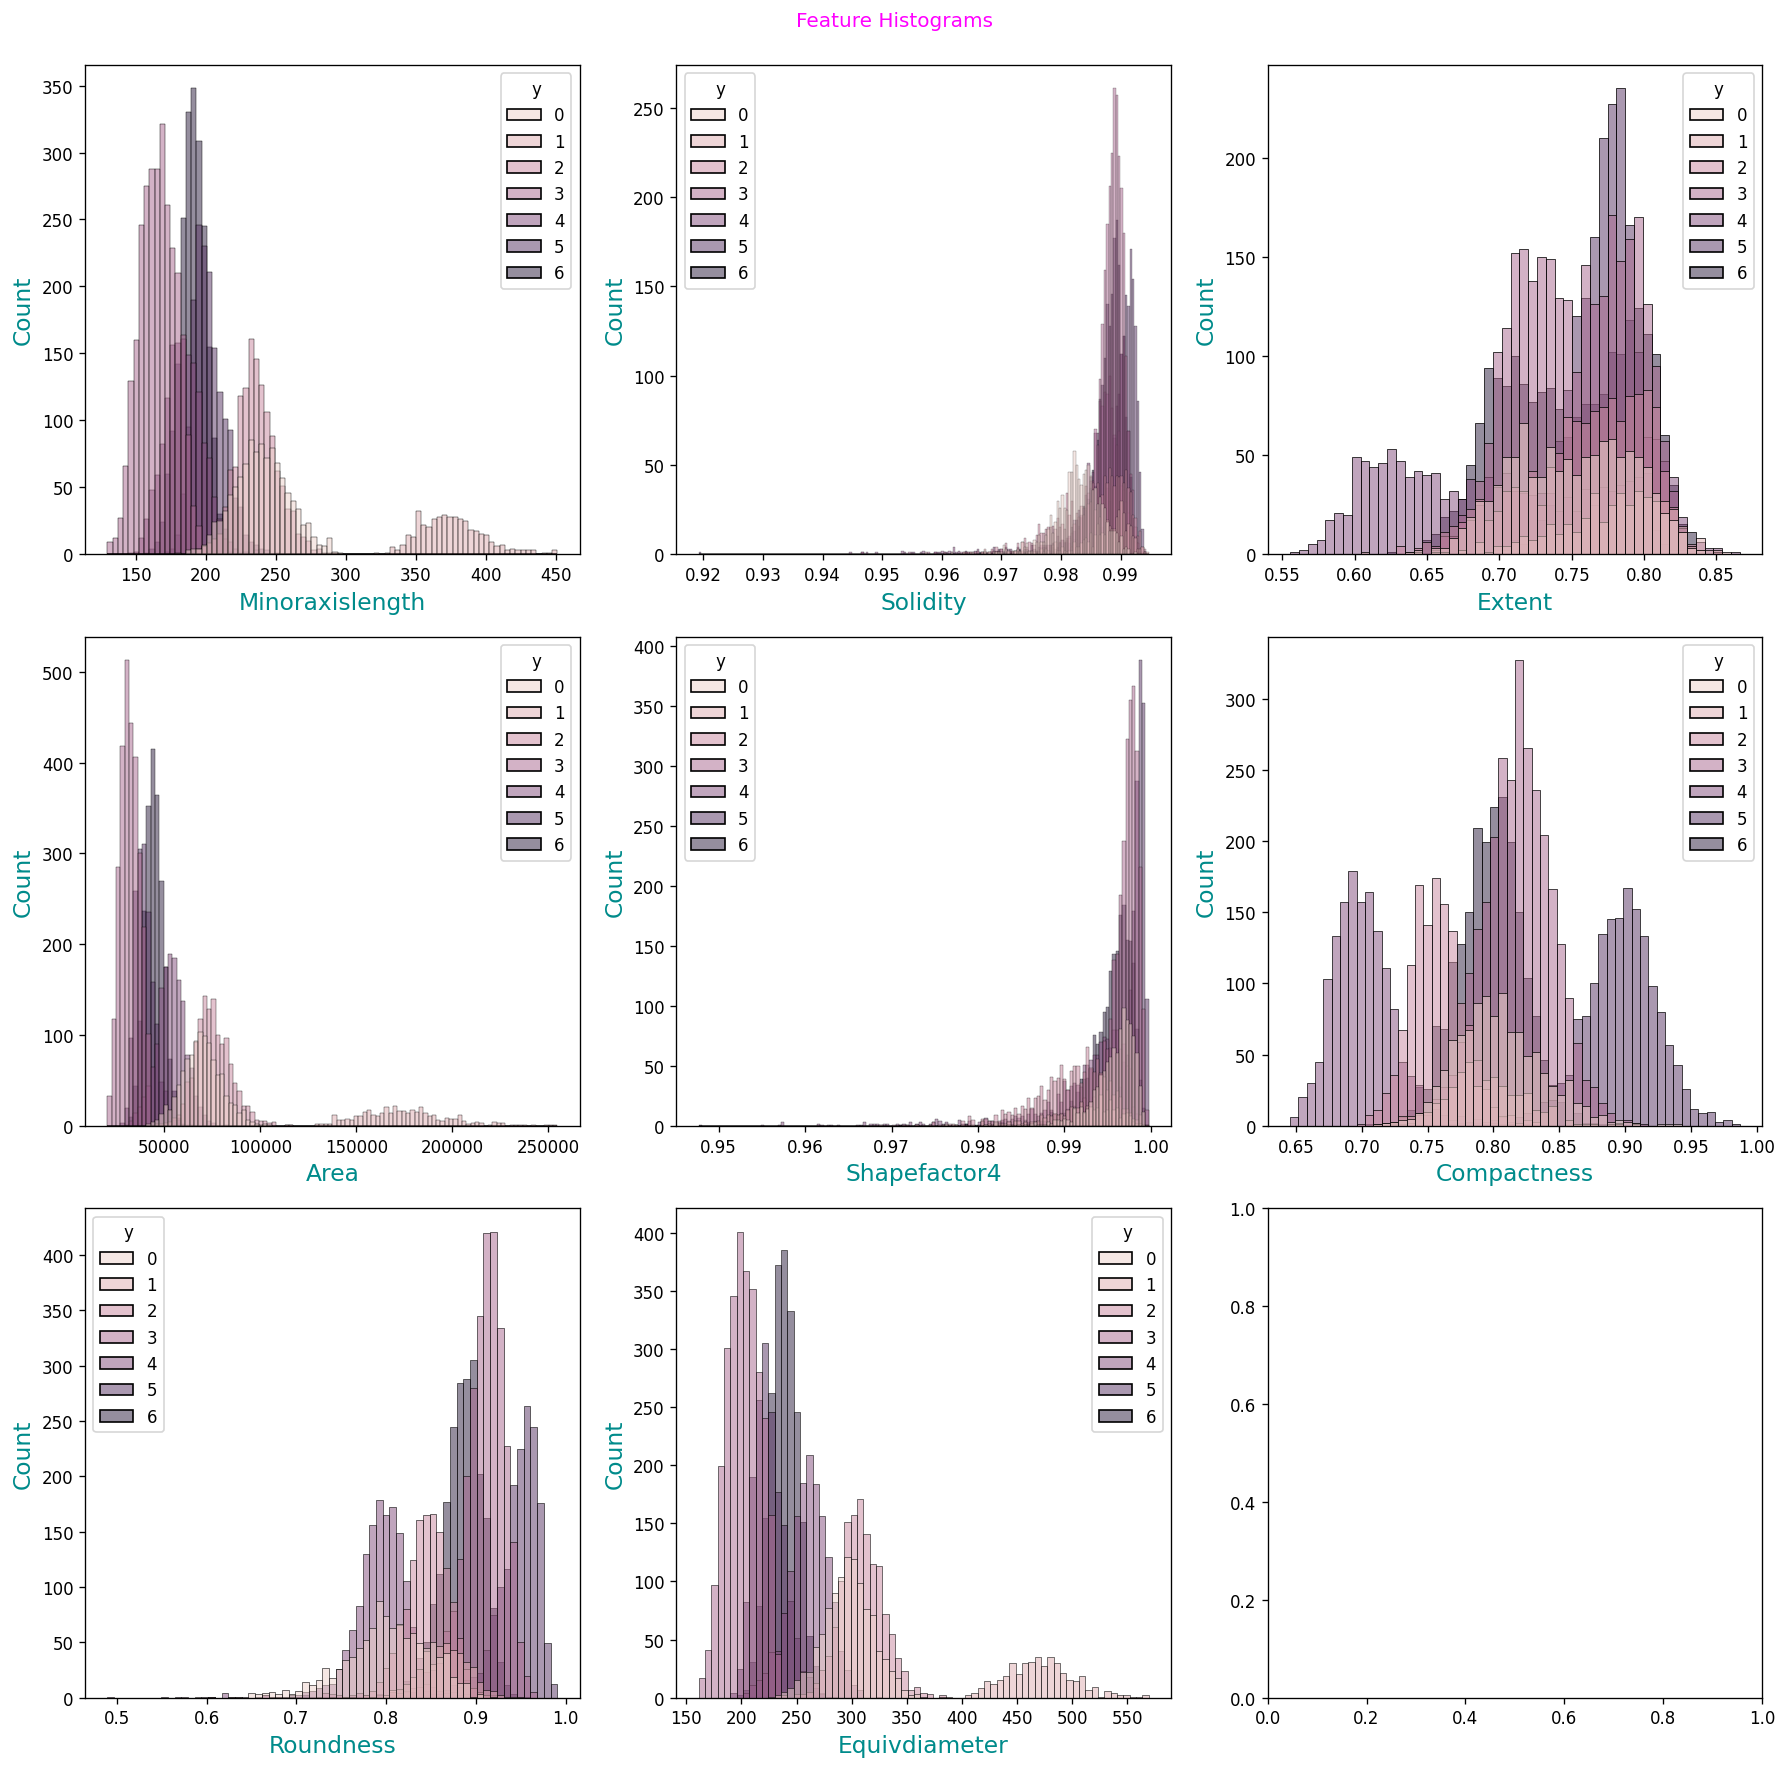

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), dpi=120)
for col, ax in zip(num_cols[:8], axes.flatten()):
    sns.histplot(data=df, x=col, ax=ax, hue='y');
    ax.set_xlabel(f"{col.title().replace('_', ' ')}", fontdict=axes_font)
    ax.set_ylabel('Count', fontdict=axes_font)
plt.suptitle(f"Feature Histograms", fontdict=suptitle_font)
plt.tight_layout()
plt.subplots_adjust(top=0.95);

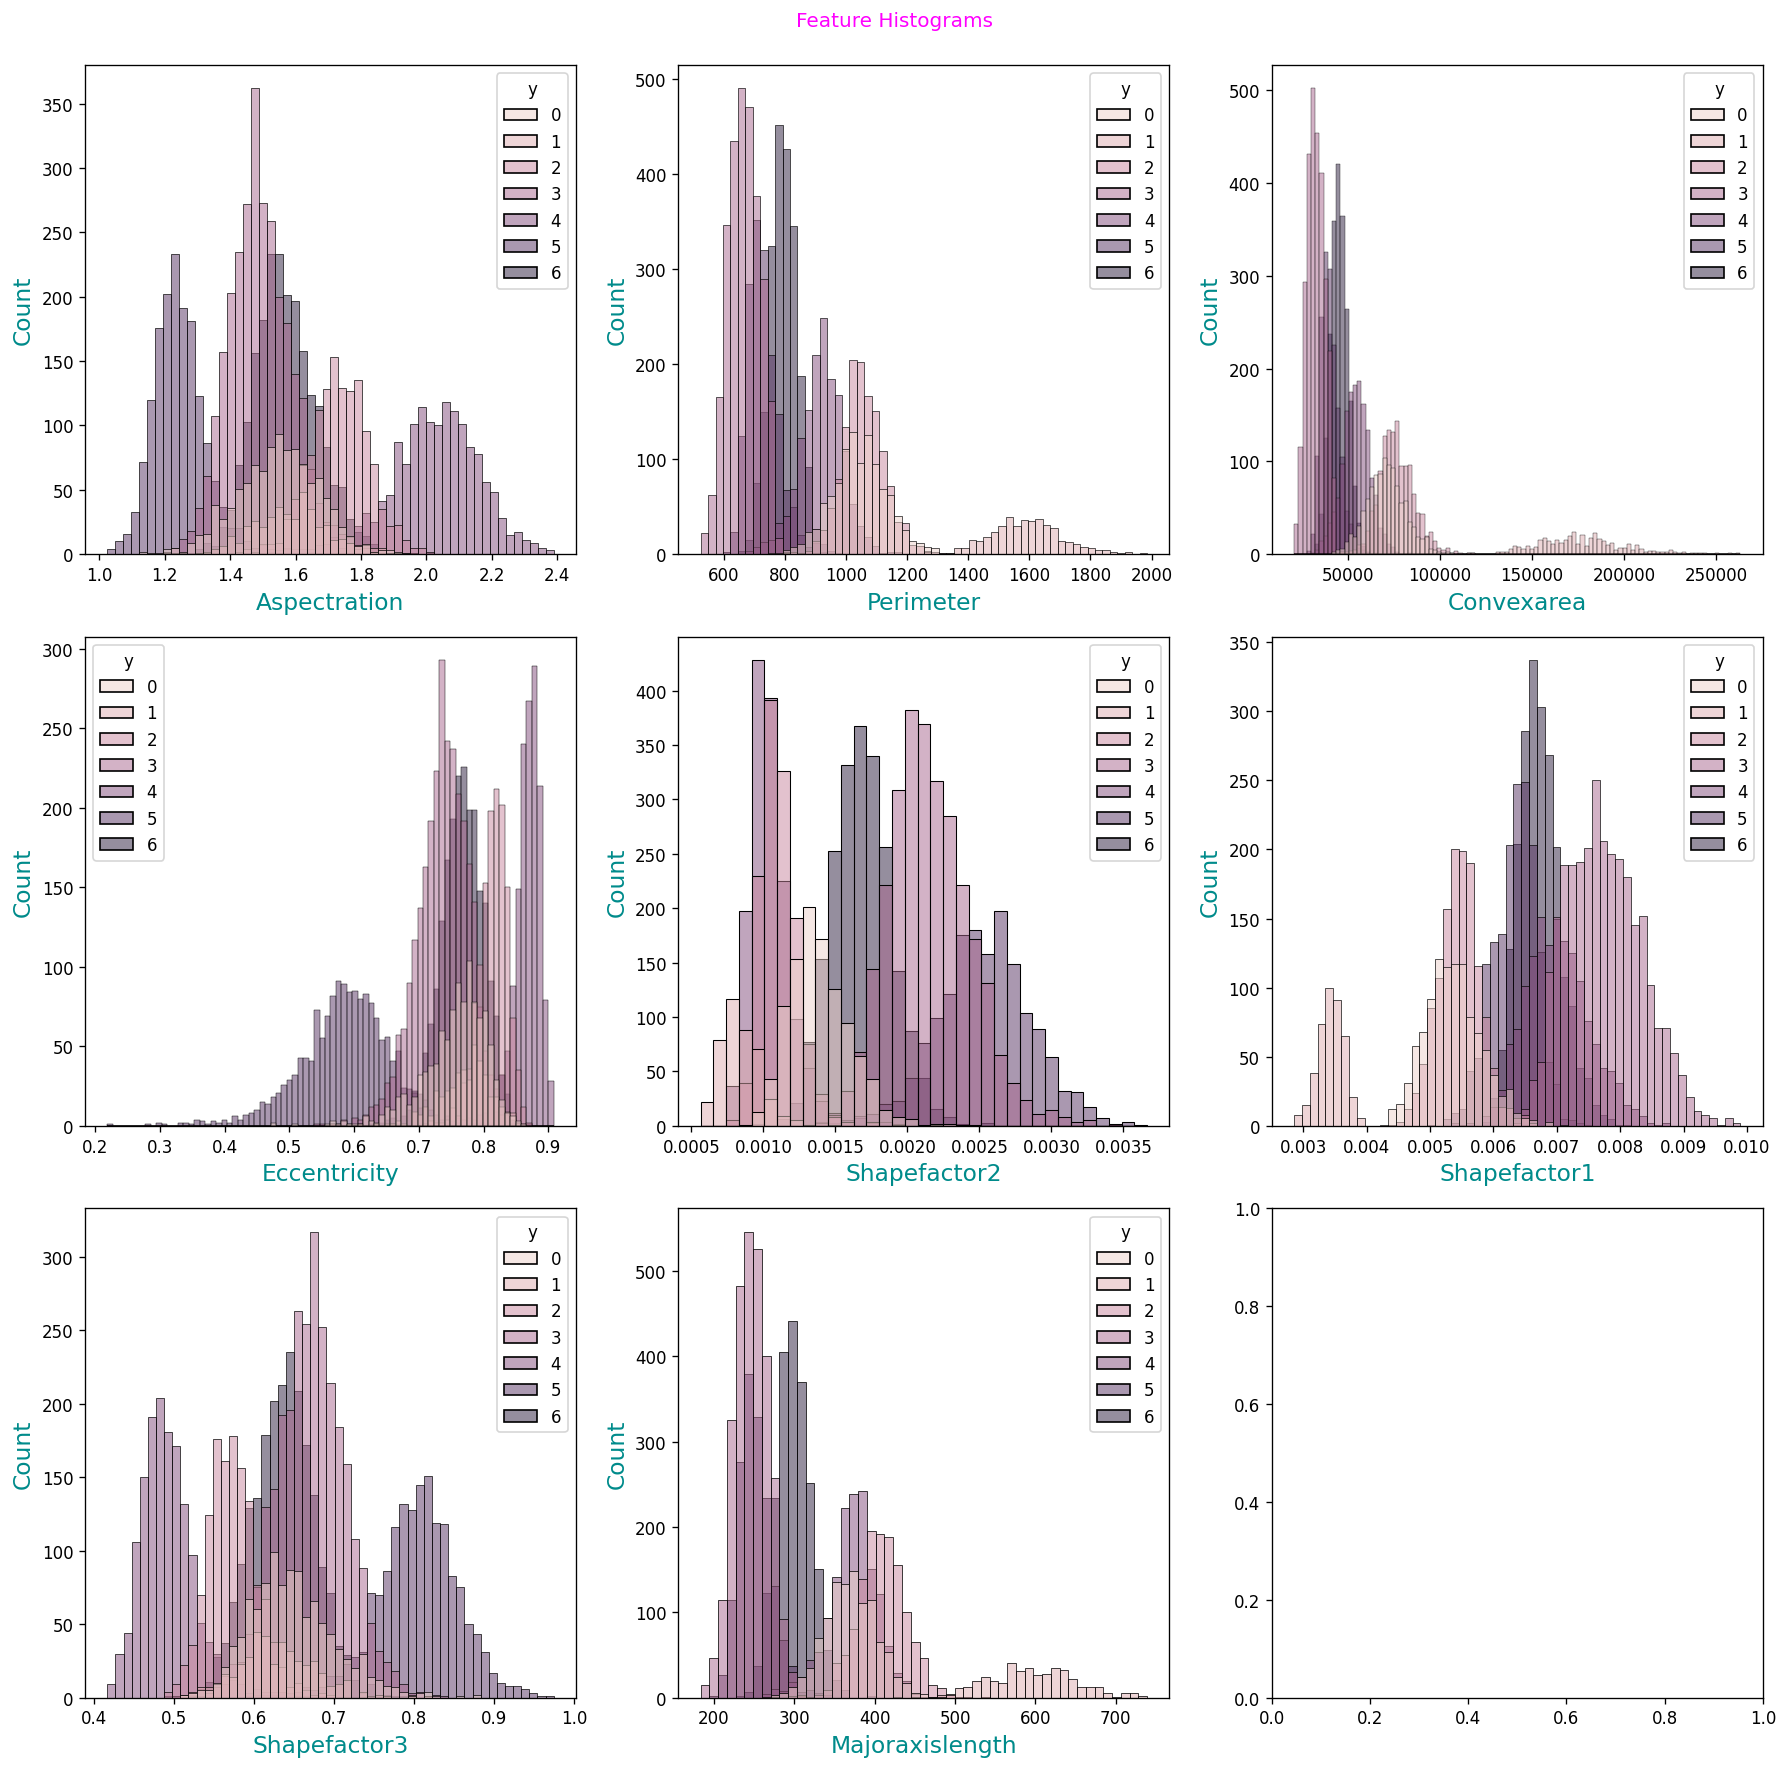

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), dpi=120)
for col, ax in zip(num_cols[8:], axes.flatten()):
    sns.histplot(data=df, x=col, ax=ax, hue='y');
    ax.set_xlabel(f"{col.title().replace('_', ' ')}", fontdict=axes_font)
    ax.set_ylabel('Count', fontdict=axes_font)
plt.suptitle(f"Feature Histograms", fontdict=suptitle_font)
plt.tight_layout()
plt.subplots_adjust(top=0.95);

### Heatmap Plot

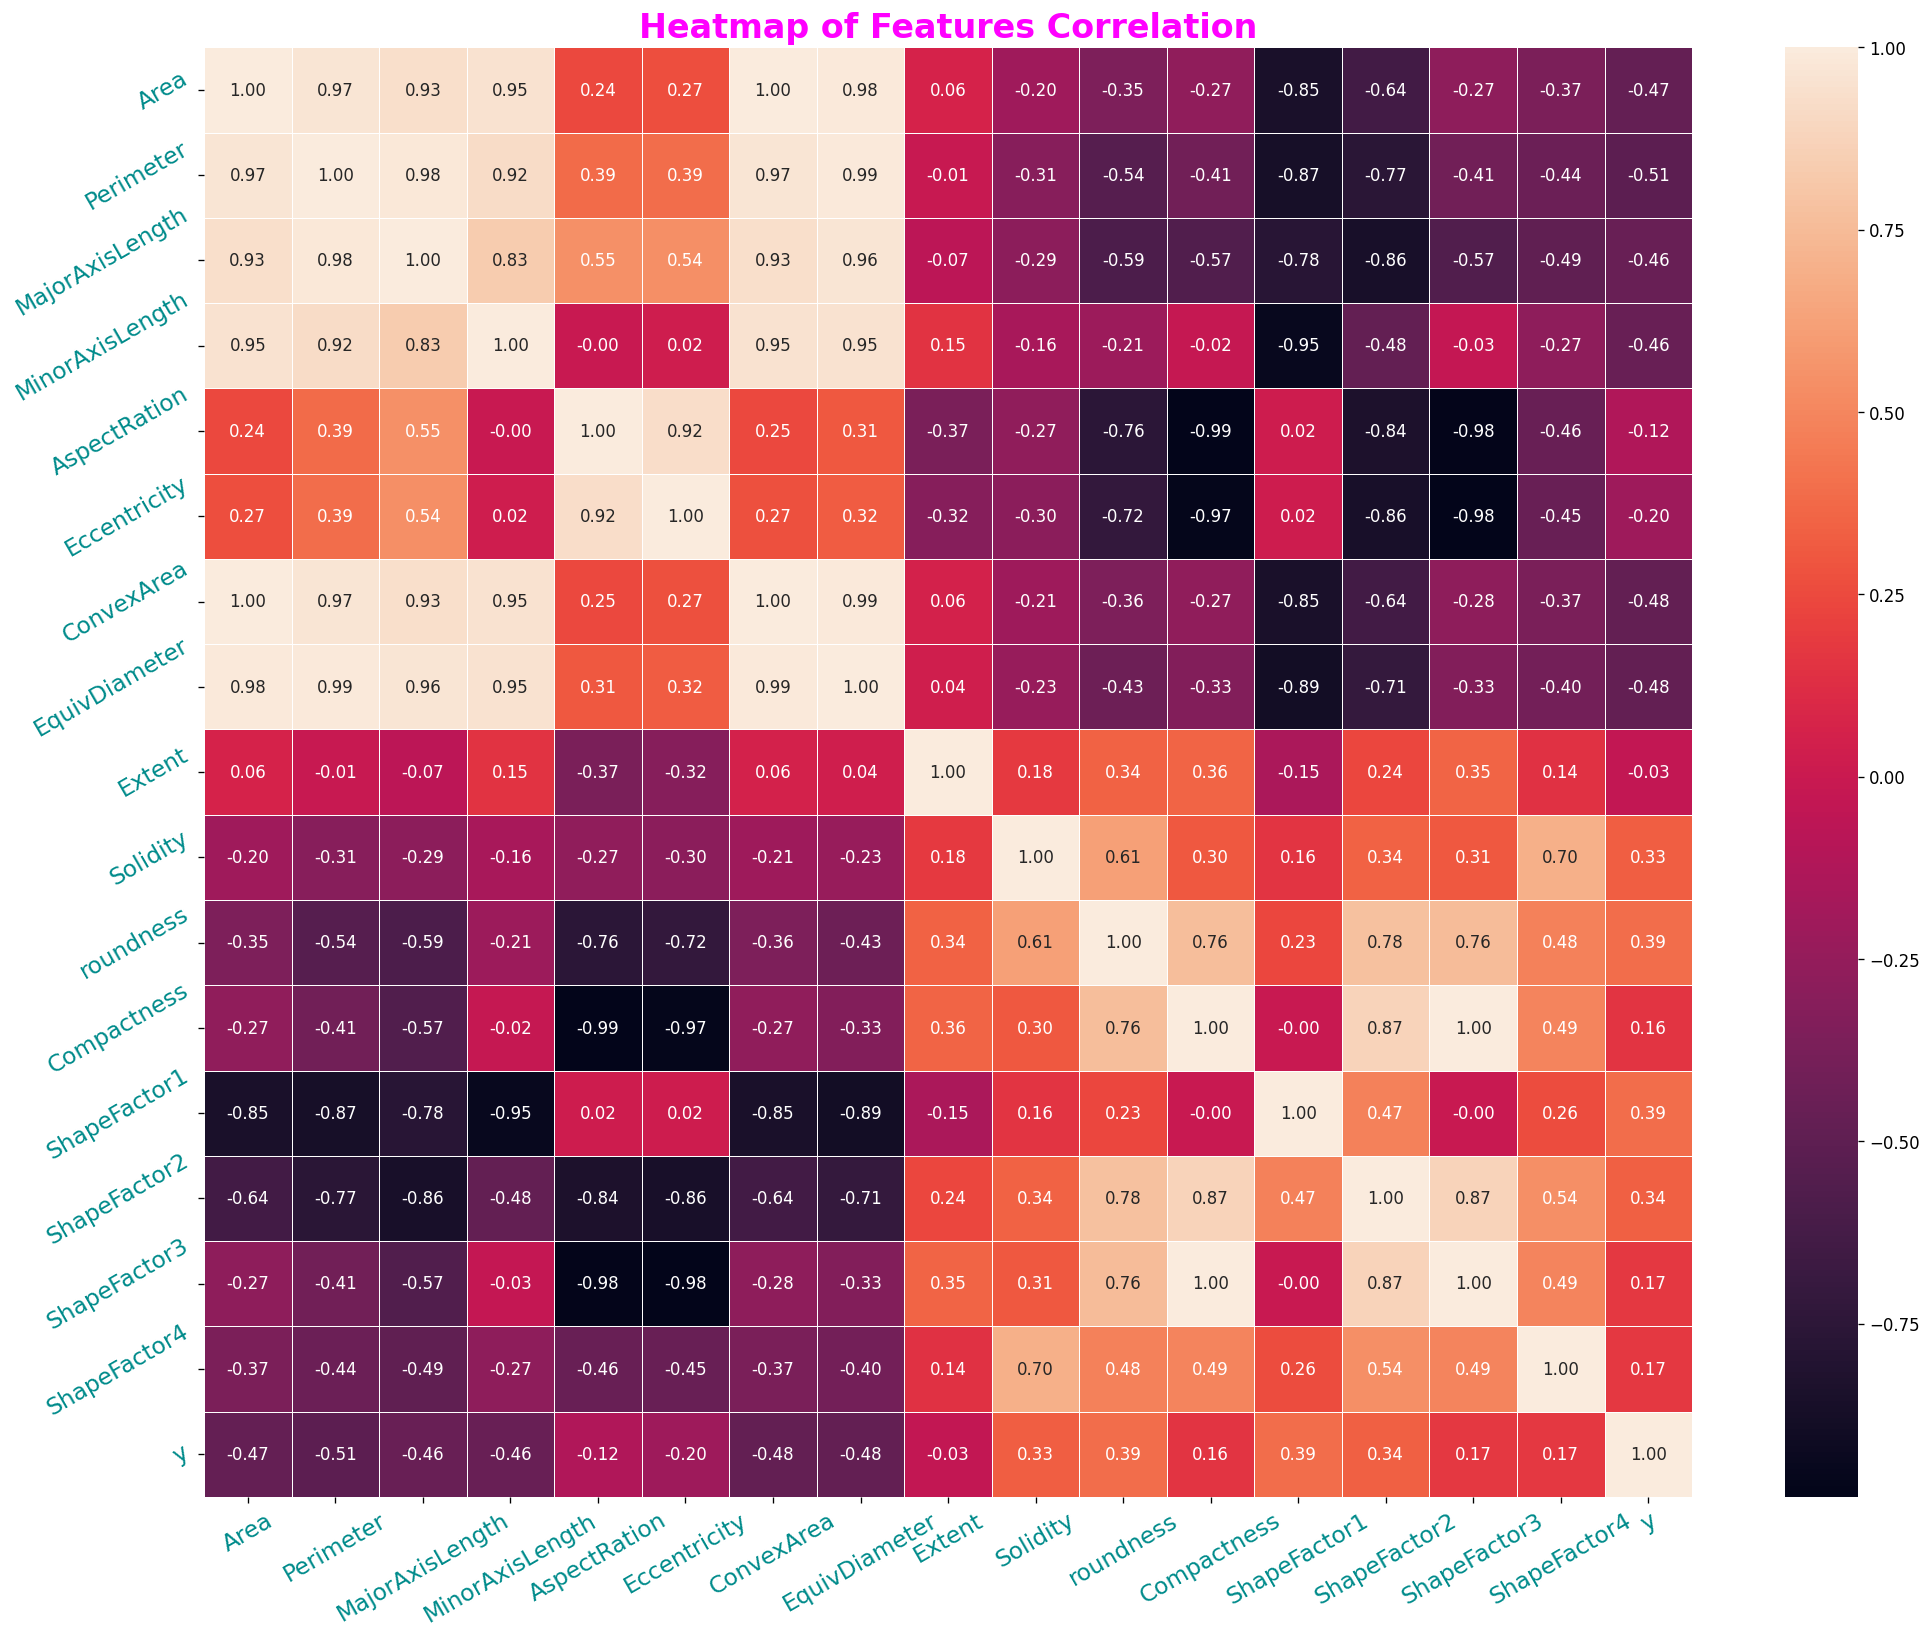

In [18]:
corr_mat = df.corr()
plt.subplots(figsize = (20, 16), dpi=120)
plt.title('Heatmap of Features Correlation', fontdict=suptitle_font)
hmap = sns.heatmap(corr_mat, linewidth = 0.5, fmt='.2f', annot=True)
hmap.set_yticklabels(hmap.get_yticklabels(), rotation = 30, fontdict=axes_font)
hmap.set_xticklabels(hmap.get_xticklabels(), rotation = 30, fontdict=axes_font);

### Boxplots

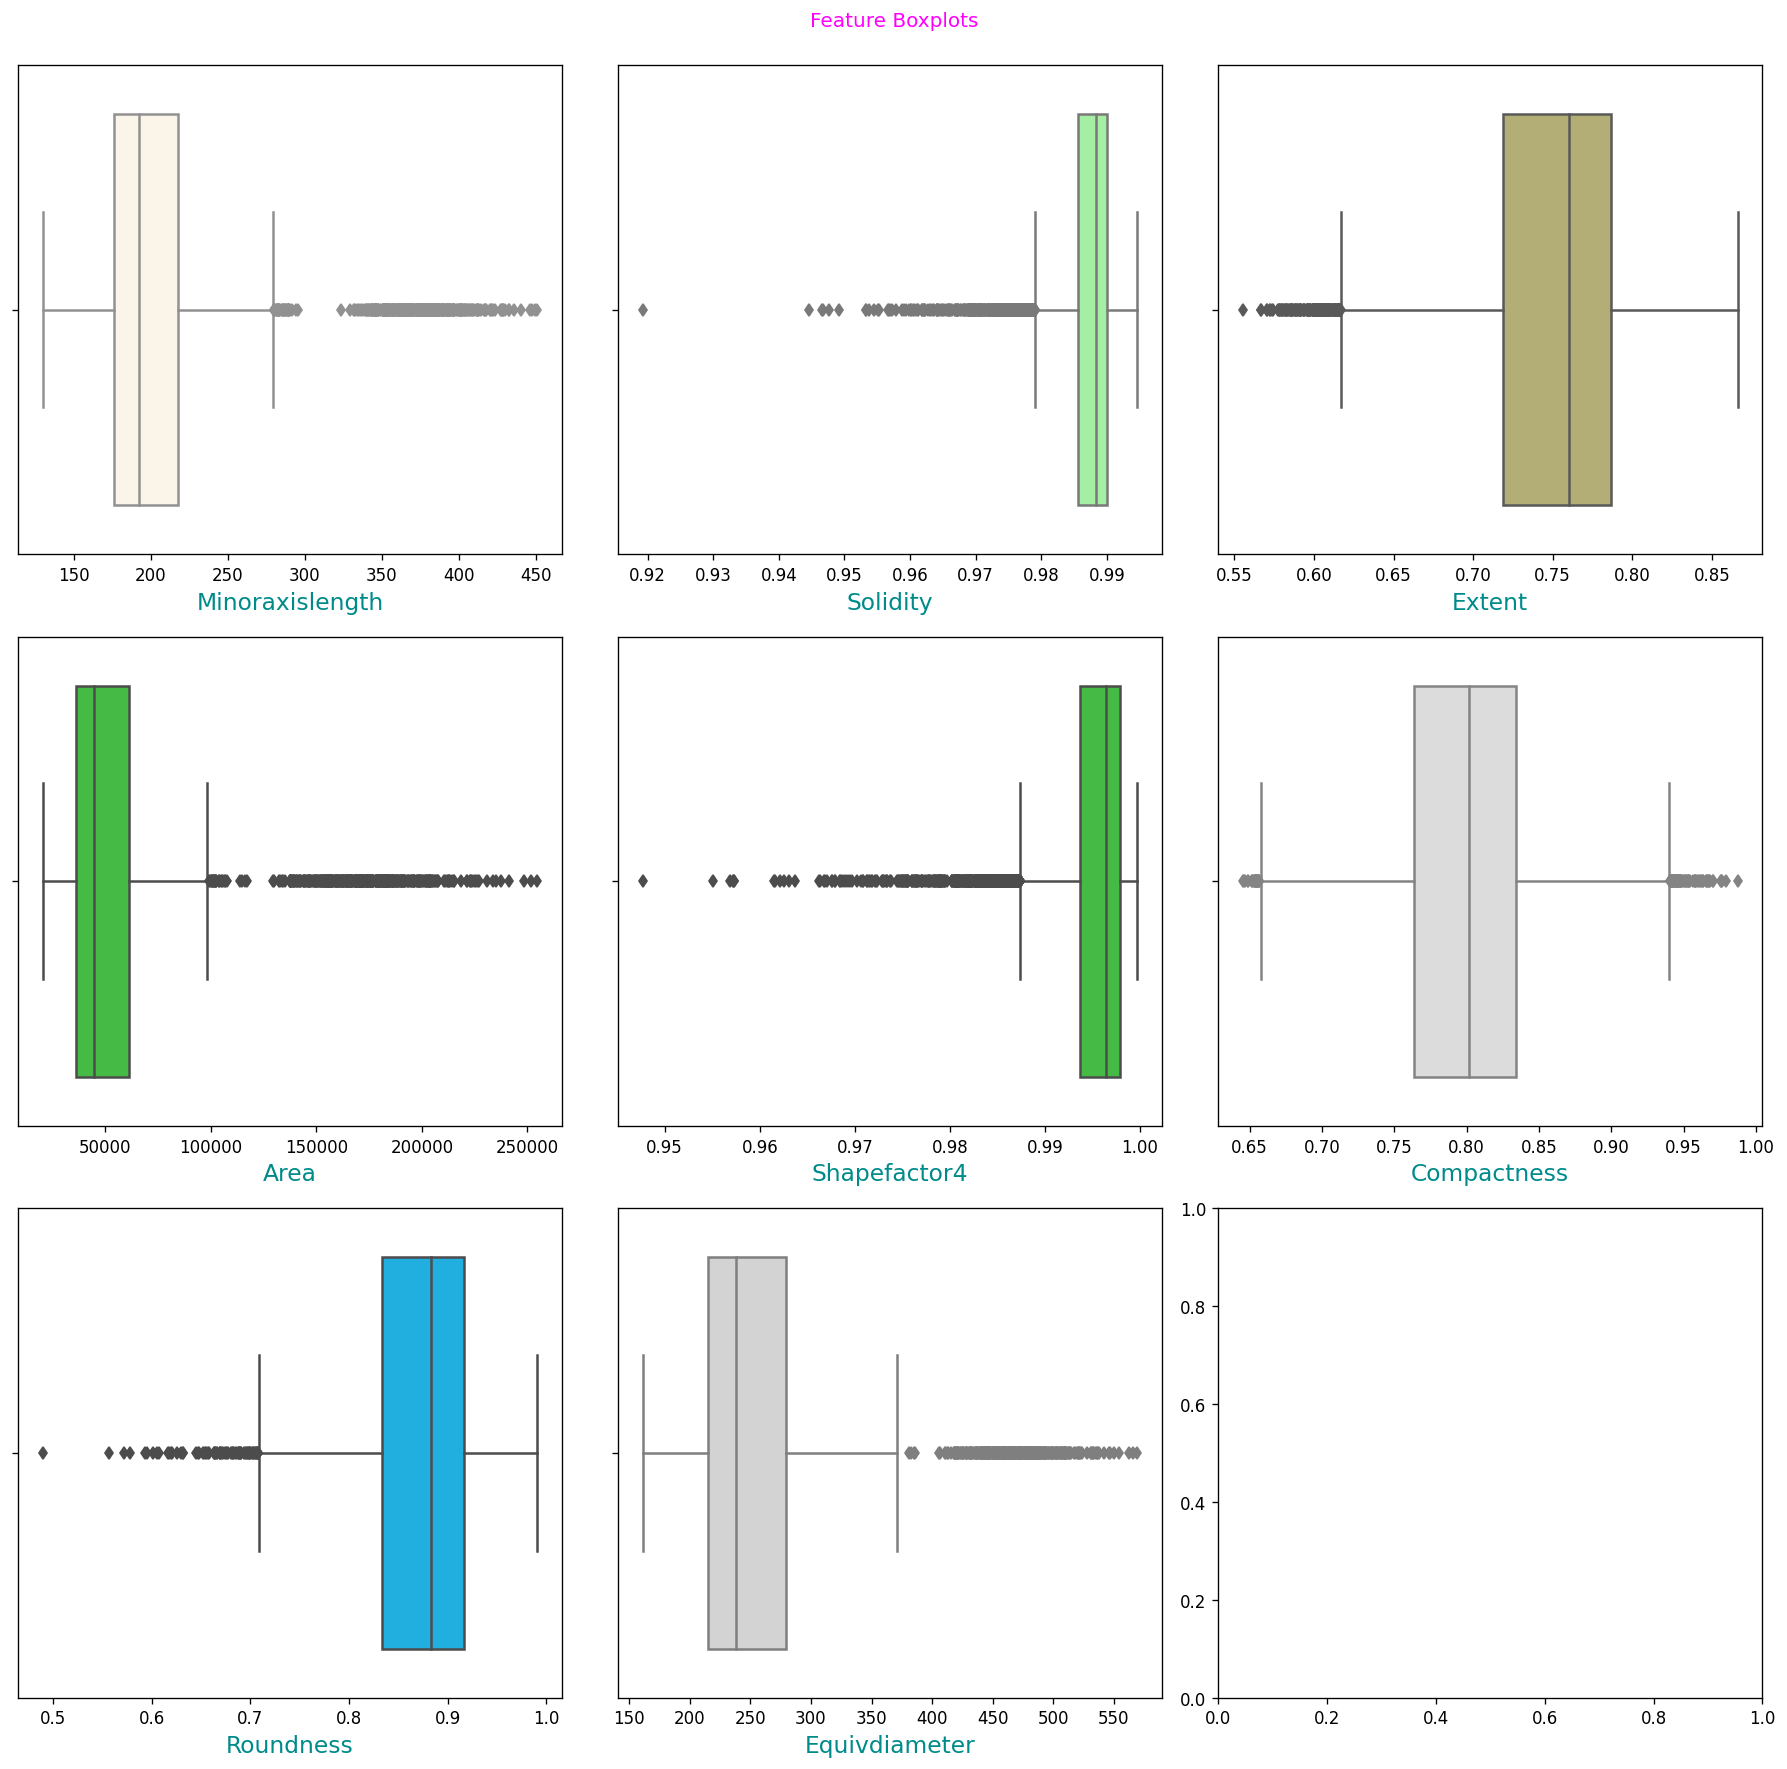

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), dpi=120)
for col, ax in zip(num_cols[:8], axes.flatten()):
    sns.boxplot(data=df, x=col, ax=ax, color=choice(colors))
    ax.set_xlabel(f"{col.title().replace('_', ' ')}", fontdict=axes_font)
plt.suptitle(f"Feature Boxplots", fontdict=suptitle_font)
plt.tight_layout()
plt.subplots_adjust(top=0.95);

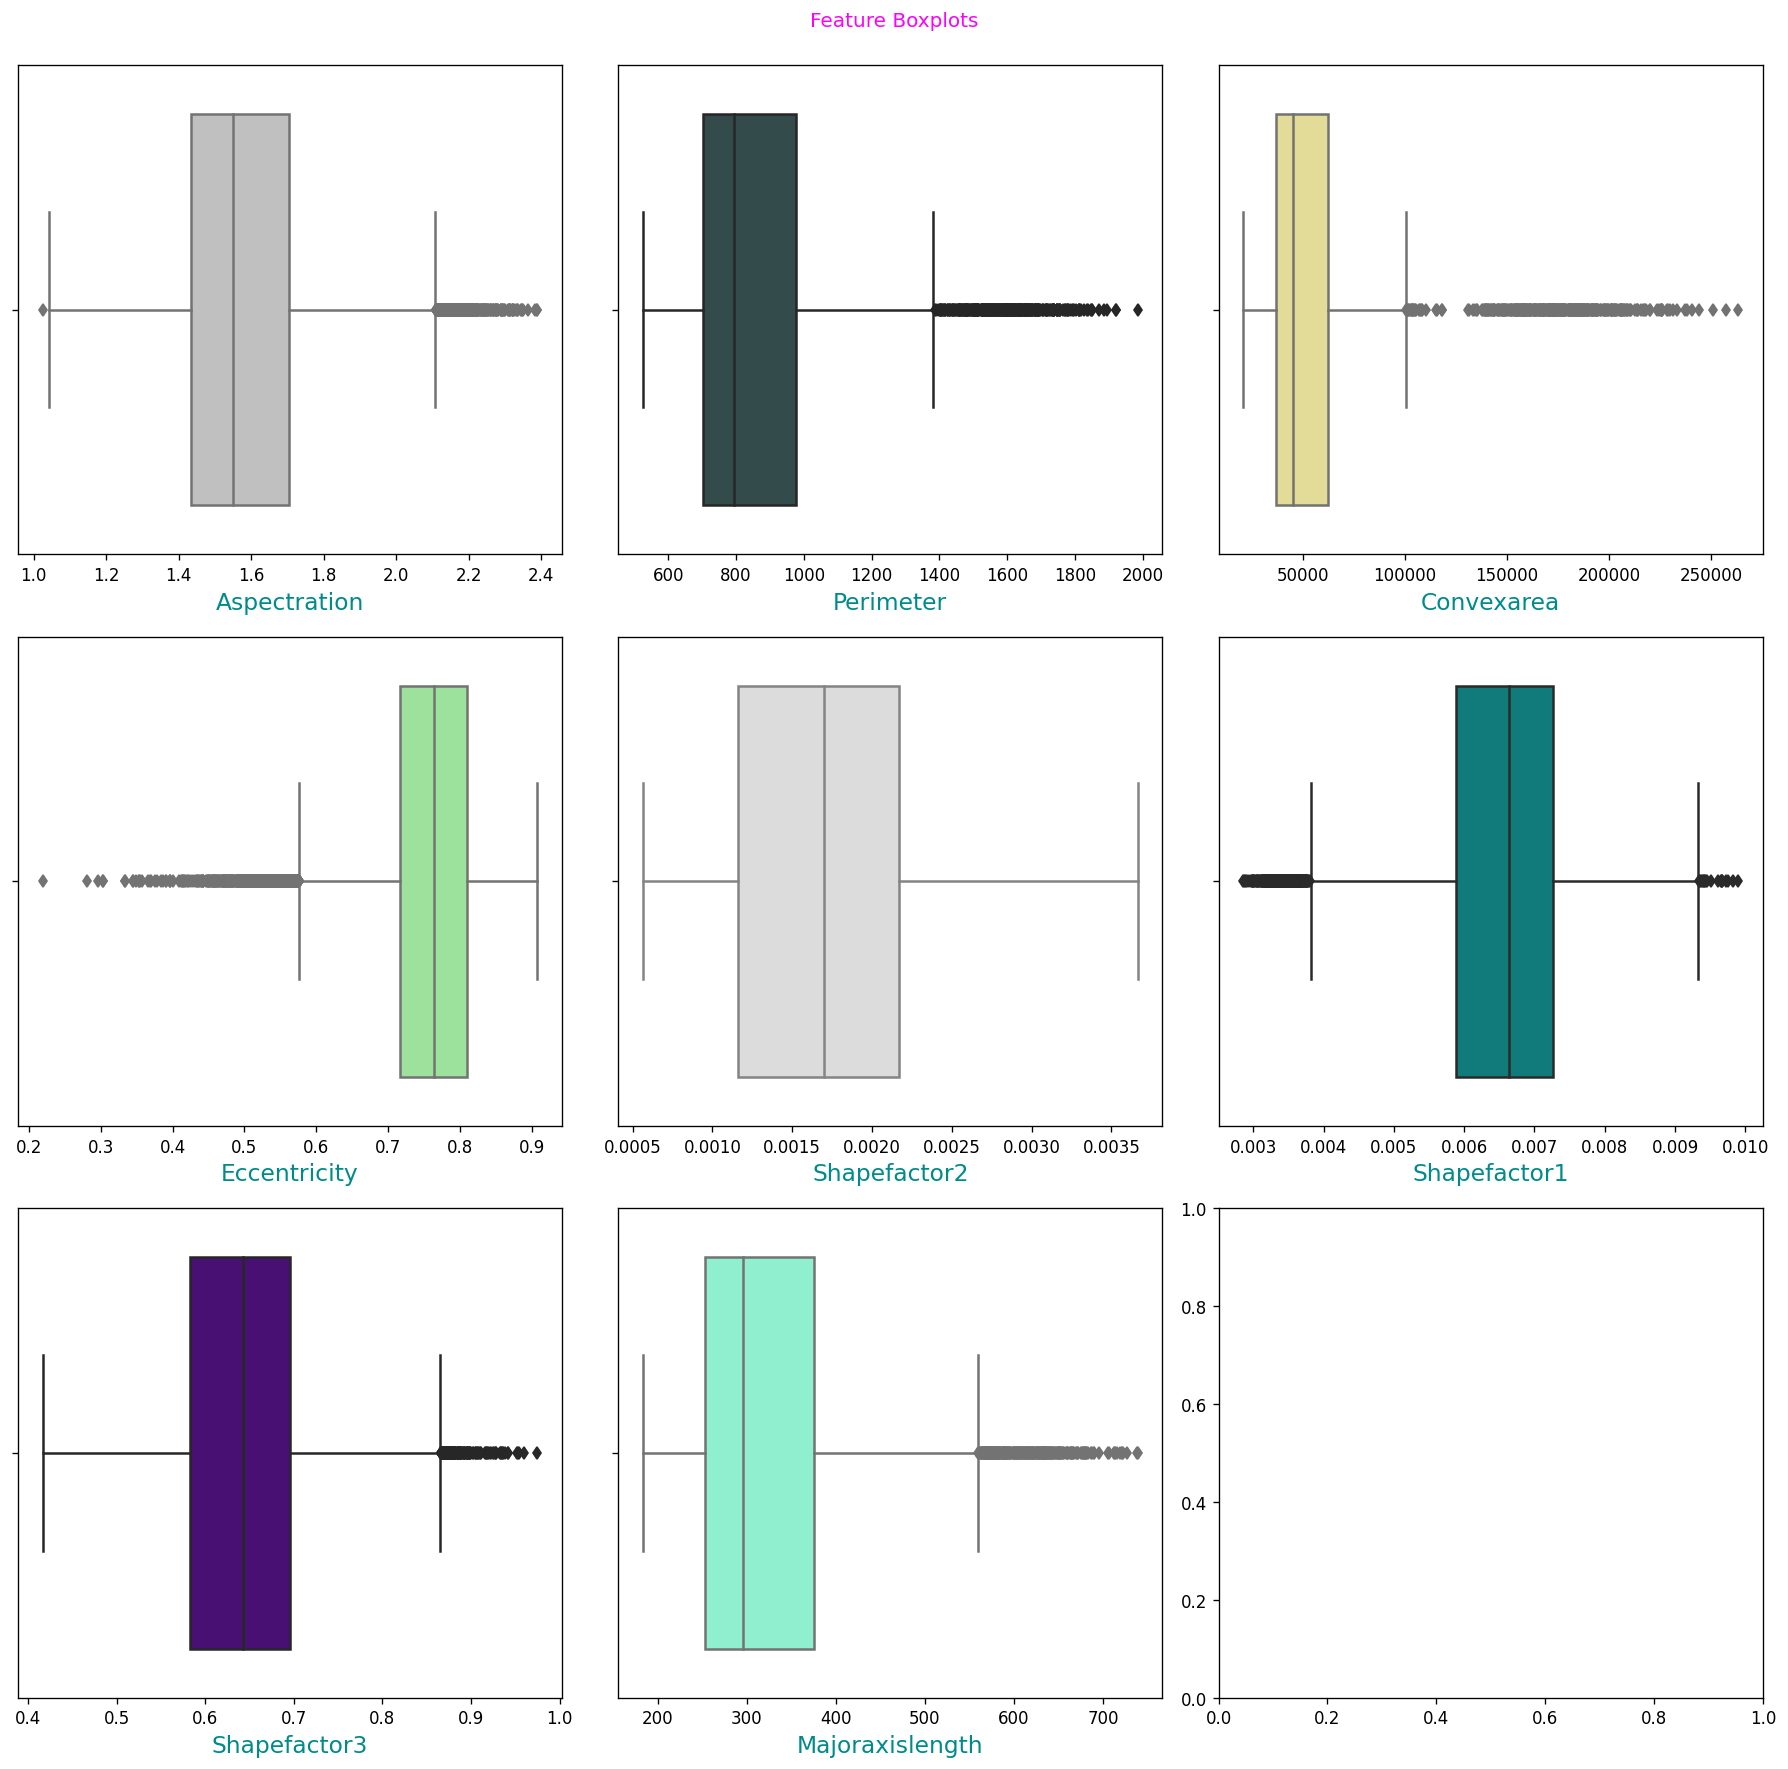

In [20]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), dpi=120)
for col, ax in zip(num_cols[8:], axes.flatten()):
    sns.boxplot(data=df, x=col, ax=ax, color=choice(colors))
    ax.set_xlabel(f"{col.title().replace('_', ' ')}", fontdict=axes_font)
plt.suptitle(f"Feature Boxplots", fontdict=suptitle_font)
plt.tight_layout()
plt.subplots_adjust(top=0.95);

### Bar Plot

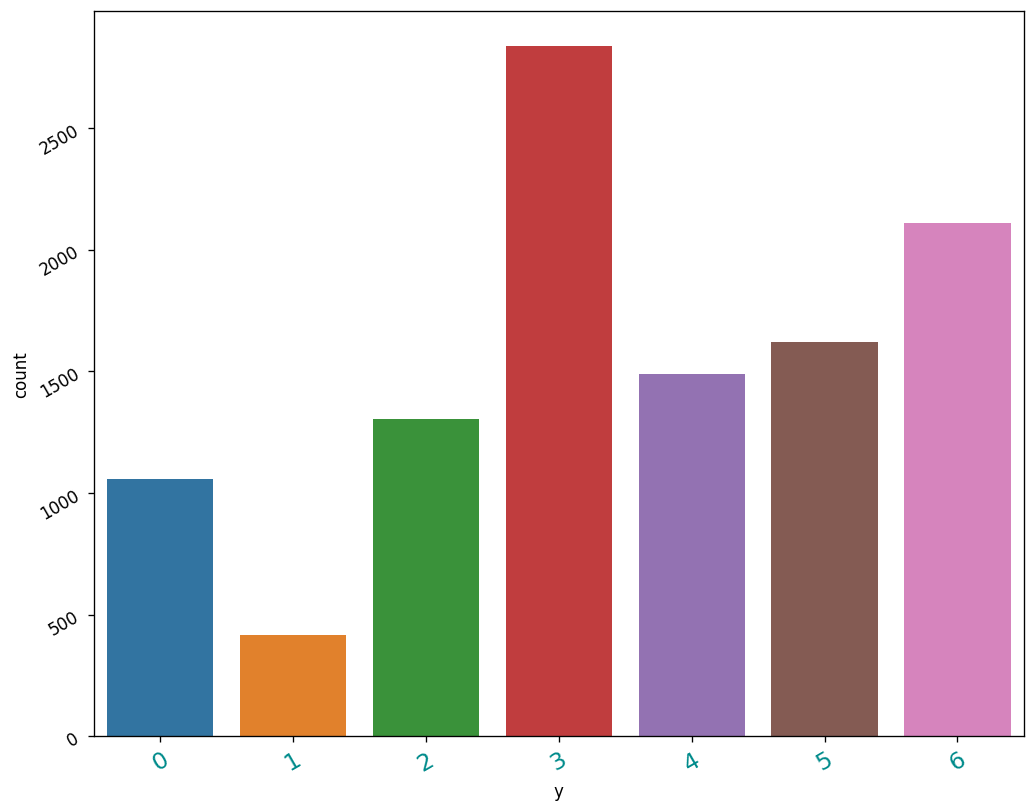

In [21]:
fig, ax = plt.subplots(1, figsize=(10, 8), dpi=120)
ax.tick_params(axis='both', rotation=30)
cplot = sns.countplot(x=df['y'], ax=ax);
cplot.set_xticklabels(cplot.get_xticklabels(), rotation = 30, fontdict=axes_font);

### Observations

- The data features exhibit skewness that need to be handled.
- The data conains outliers that require handling (Clamping, etc.).
- The data is imbalanced.

---------------------------

# `04` Data Preprocessing

## `i` Train \ Validation Split

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop(columns=['y']), df['y'], test_size=0.20, random_state=0)

## `ii` Normalization

In [23]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
test_np = scaler.transform(test)

--------------------------

# `+` tSNE Plot

In [24]:
tsne = TSNE(init='pca')
data_tsne = tsne.fit_transform(X_train)

In [25]:
color_map = {f'{encoder.classes_[i]}': px.colors.qualitative.Vivid[i] for i in range(7)}
legend_items = [f'{encoder.classes_[i]}' for i in y_train]
title = f"Dry Beans - t-SNE Plot"
fig_1 = px.scatter(data_frame=data_tsne, x=data_tsne[:, 0], y=data_tsne[:, 1], color=legend_items, title=title, color_discrete_map=color_map,
                 hover_name=legend_items, labels={'color': 'Species'})

In [26]:
fig_1.update_layout(width=1100, height=1000, 
                title={'y':0.96, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                title_font_color='magenta', title_font_size=24)
fig_1.show()

-----------------

# `05` Model Training

In [27]:
svc_model = SVC(C=13, gamma='auto', probability=True)
svc_model.fit(X_train, y_train)

SVC(C=13, gamma='auto', probability=True)

-----------------

# `06` Model Evaluation

In [28]:
def print_report(model, X_train, X_valid, y_train, y_valid):
    print("Training Report:\n----------------")
    print(classification_report(y_train, model.predict(X_train), target_names=encoder.classes_))
    print("\n\nValidation Report:\n------------------")
    print(classification_report(y_valid, model.predict(X_valid), target_names=encoder.classes_))


In [29]:
print_report(svc_model, X_train, X_valid, y_train, y_valid)

Training Report:
----------------
              precision    recall  f1-score   support

    BARBUNYA       0.97      0.94      0.95       833
      BOMBAY       1.00      1.00      1.00       330
        CALI       0.95      0.96      0.96      1043
    DERMASON       0.92      0.93      0.92      2252
       HOROZ       0.98      0.96      0.97      1200
       SEKER       0.97      0.96      0.96      1304
        SIRA       0.88      0.89      0.89      1705

    accuracy                           0.94      8667
   macro avg       0.95      0.95      0.95      8667
weighted avg       0.94      0.94      0.94      8667



Validation Report:
------------------
              precision    recall  f1-score   support

    BARBUNYA       0.92      0.92      0.92       224
      BOMBAY       1.00      1.00      1.00        88
        CALI       0.94      0.92      0.93       261
    DERMASON       0.93      0.94      0.93       585
       HOROZ       0.96      0.95      0.96       288
    

--------------------------

# `07` Beans Prediction

In [30]:
output = pd.DataFrame(encoder.inverse_transform(svc_model.predict(test_np)), columns=['y'], index=test.index)

In [31]:
output.to_csv('submission.csv')